# Wavelets

CR-Sparse

In [49]:
from skimage import metrics
from cr.sparse import lop
import jax.numpy as jnp
import matplotlib.pyplot as plt
import cr.sparse as crs
import skimage.data
import matplotlib.pyplot as plt
import cr.nimble as cnb

In [75]:
def apply_2d_operator_to_3d(image, operator, axis=-1):
    # Swap axes to iterate over the specified axis
    image_swapped = np.swapaxes(image, axis, 0)

    # Apply the 2D operator along the first axis
    coefs_swapped = np.array([operator.times(slice_) for slice_ in image_swapped])

    # Swap axes back to the original order
    coefs = np.swapaxes(coefs_swapped, 0, axis)

    return coefs

In [82]:
image = nib.load(glob.glob('/wynton/group/rsl/OASIS/OAS1_0001_MR1/mri/T1.nii.gz')[0]).get_fdata()
print(image.shape)

(256, 256, 256)


In [83]:
DWT2_op = lop.dwt2D(image.shape, wavelet='haar', level=5)
DWT2_op = lop.jit(DWT2_op)

In [87]:
coefs = apply_2d_operator_to_3d(image, DWT2_op, axis=2)

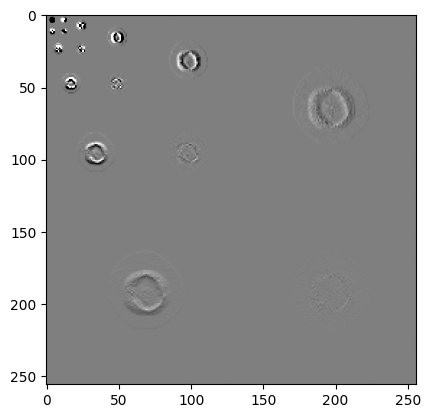

In [77]:
plt.imshow(coefs[:, :, 28], cmap='gray_r', vmin=-1e2, vmax=1e2)

In [64]:
h, w = coefs.shape
coefs2 = jnp.zeros_like(coefs)
coefs2 = coefs2.at[:h//4, :w//4].set(coefs[:h//4, :w//4])

12.995801
-22.27606


(-0.5, 255.5, 255.5, -0.5)

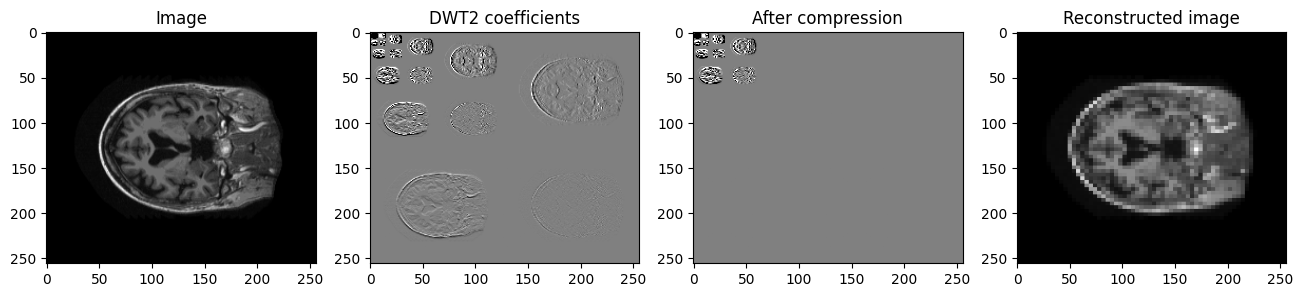

In [65]:
image_rec = DWT2_op.trans(coefs2)
# RMSE
rmse = cnb.root_mse(image, image_rec)
print(rmse)
# PSNR
psnr = cnb.peak_signal_noise_ratio(image, image_rec)
print(psnr)

# Plot everything
fig, axs = plt.subplots(1, 4, figsize=(16, 3))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Image')
axs[0].axis('tight')

axs[1].imshow(coefs, cmap='gray_r', vmin=-1e2, vmax=1e2)
axs[1].set_title('DWT2 coefficients')
axs[1].axis('tight')

axs[2].imshow(coefs2, cmap='gray_r', vmin=-1e2, vmax=1e2)
axs[2].set_title('After compression')
axs[2].axis('tight')

axs[3].imshow(image_rec, cmap='gray')
axs[3].set_title('Reconstructed image')
axs[3].axis('tight')